In [10]:
using Revise
using Condor
using NPZ
using Healpix
using Plots
using PyCall
using Falcons
using PyPlot
hp = pyimport("healpy")

PyObject <module 'healpy' from '/home/cmb/yusuket/.conda/envs/hpenv/lib/python3.8/site-packages/healpy/__init__.py'>

Calculating multipoles up to lmax = 767, mmax = 767


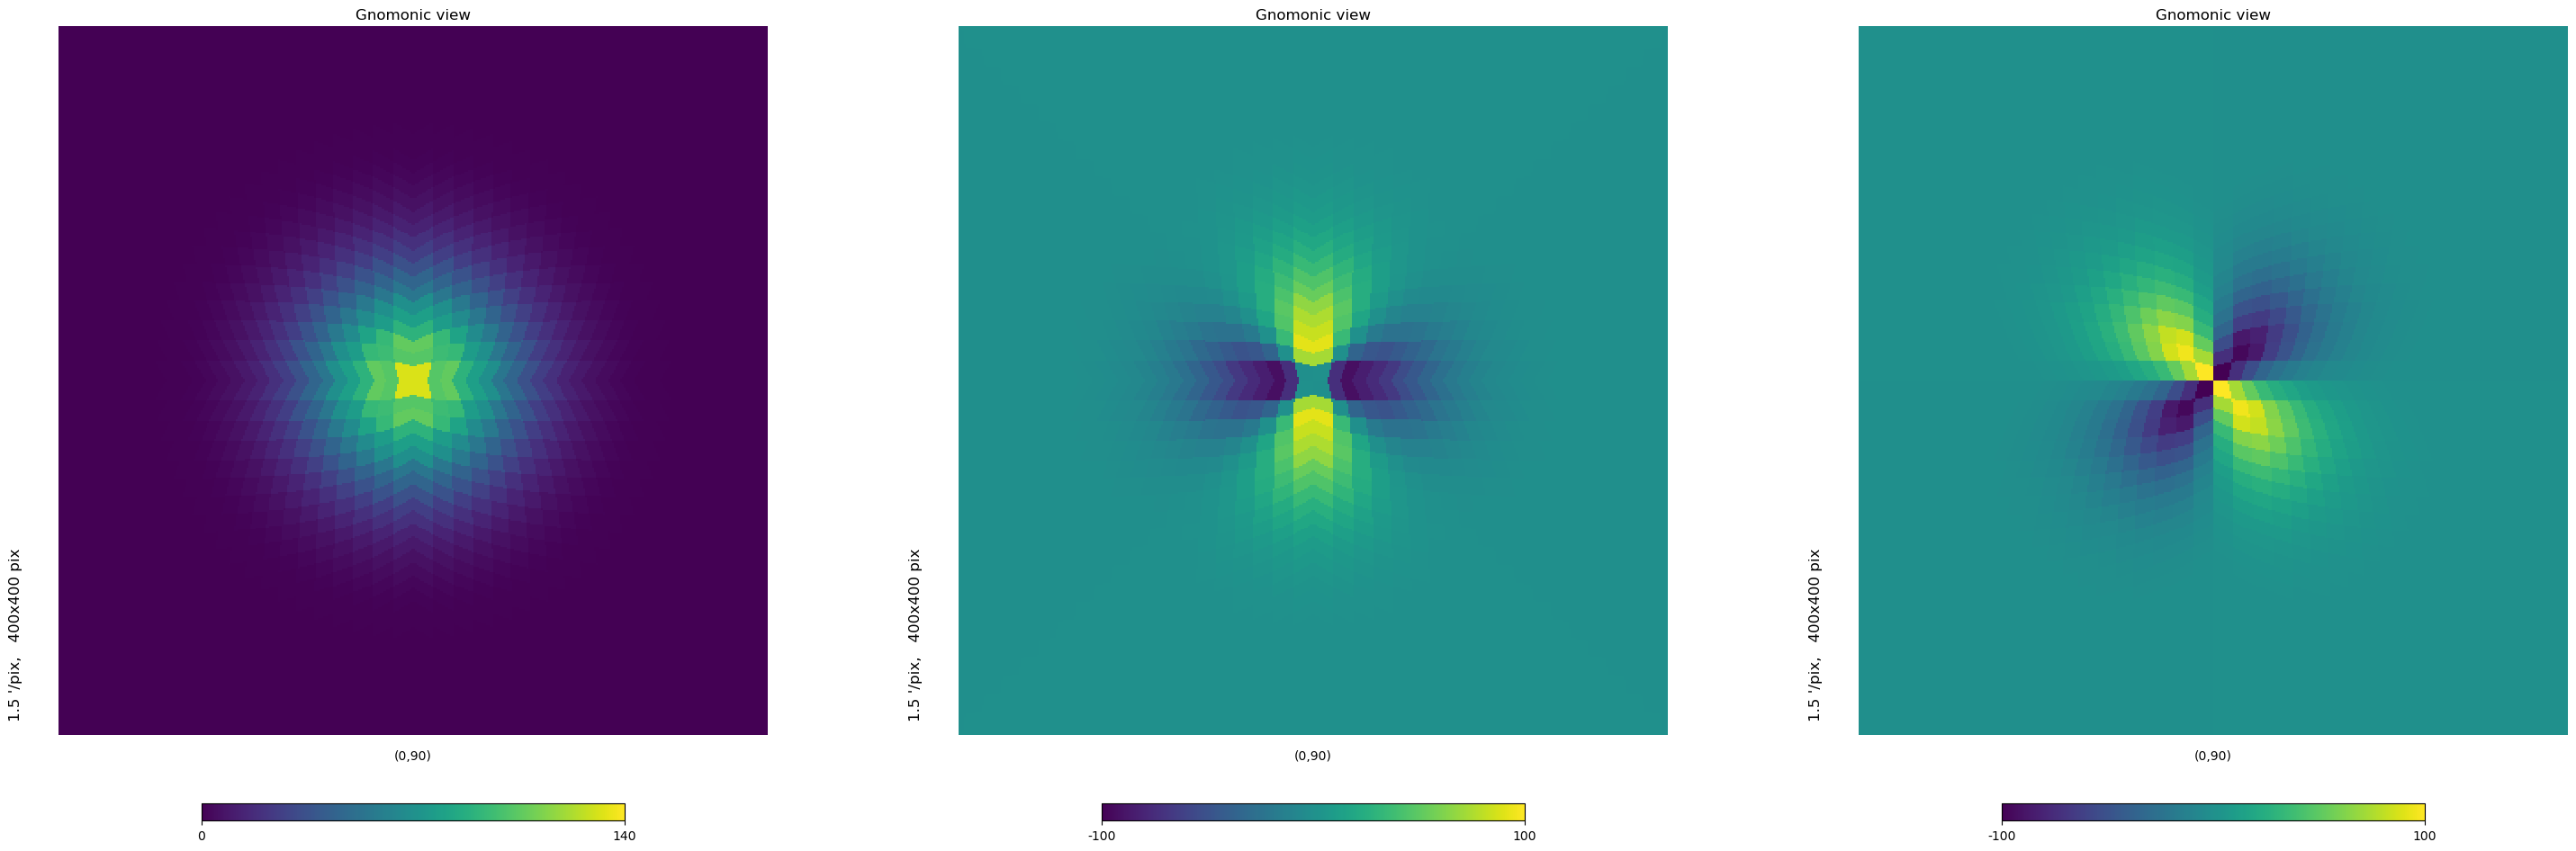

In [11]:
beamp = bm_polar_init(1000, 1001, 0.0, π/2)
s = fwhm2sigma(deg2rad(5))
beamp.stokes[1,:,:] = ones(1000) .* transpose(angular_gaussbeam(0:π/1000:π, s));
beamp.stokes[2,:,:] = ones(1000) .* transpose(angular_gaussbeam(0:π/1000:π, s));

nside = 256
lmax = 3nside-1
mmax = 3nside-1
weight_path = "/group/cmb/litebird/usr/full_weights/healpix_full_weights_nside_$(lpad(nside,4,'0')).fits"
Args = Dict(
    "beam_main_file_polar" => beamp,
    "beam_nside" => nside,
    "beam_lmax" => lmax,
    "beam_mmax" => lmax,
    "beam_healpix_output" => true,
    "full_weight_path" => weight_path,
    "healpy_convention" => true
)

map_blm = beam2alm(Args);
S = 400
plt.figure(figsize=(30,10))
hp.gnomview(map_blm[1].i.pixels, norm="none", rot=(0,90), sub=(1,3,1), xsize=S, ysize=S, min=0, max=140)
hp.gnomview(map_blm[1].q.pixels, norm="none", rot=(0,90), sub=(1,3,2), xsize=S, ysize=S, min=-100, max=100)
hp.gnomview(map_blm[1].u.pixels, norm="none", rot=(0,90), sub=(1,3,3), xsize=S, ysize=S, min=-100, max=100)

Calculating multipoles up to lmax = 767, mmax = 767


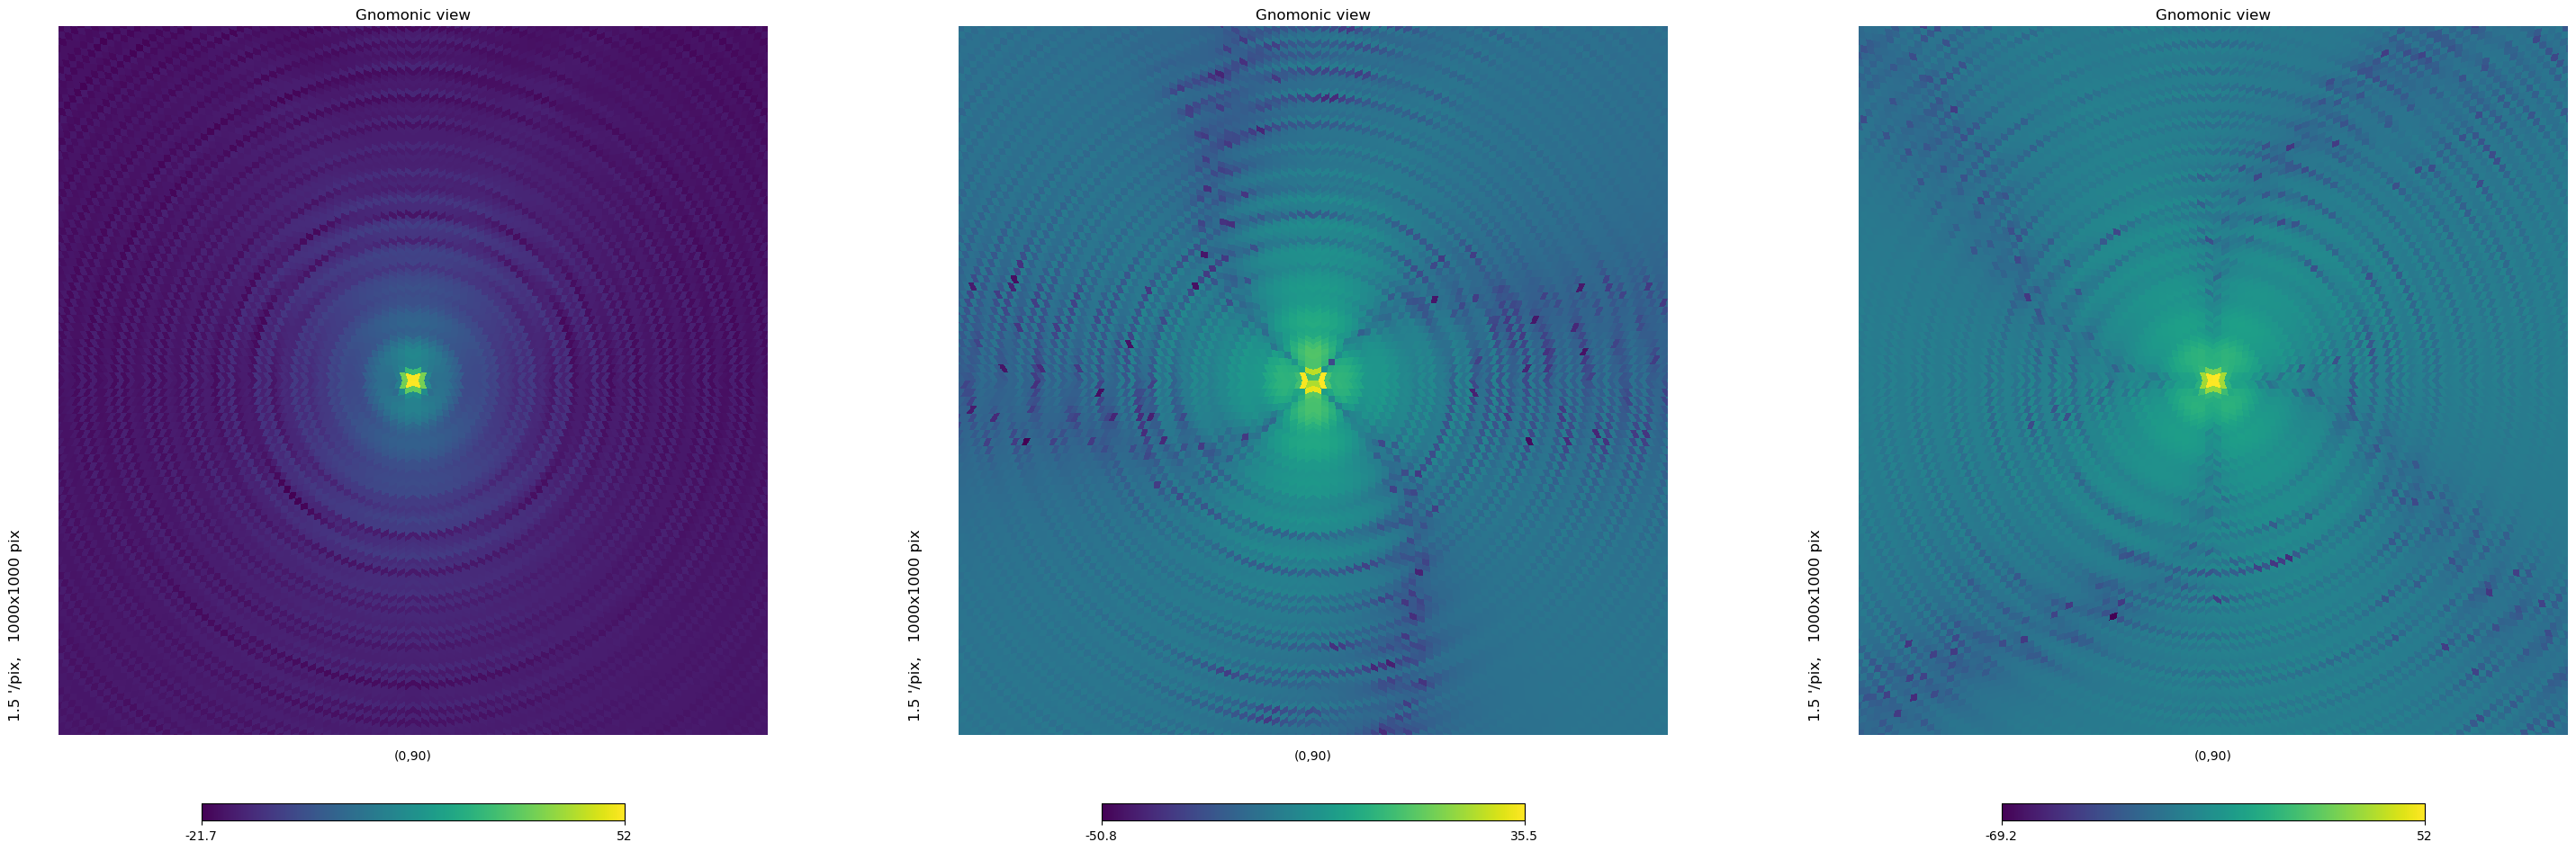

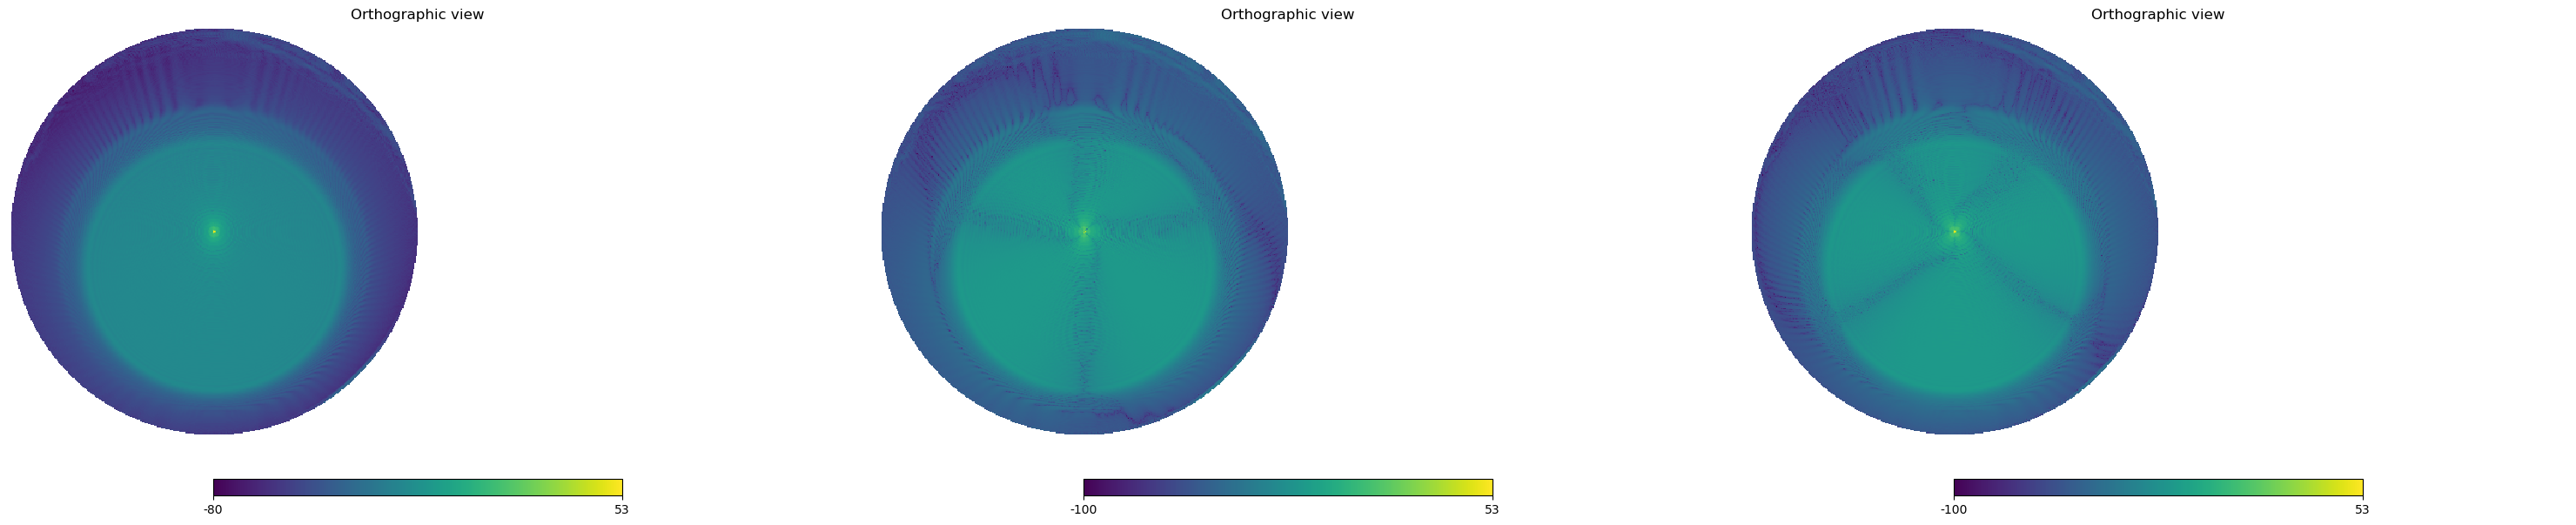

In [14]:
grid = bm_grid_read("/group/cmb/litebird/usr/nersc/GRASP/MHFT/pix0005_402_pp_f2p2_v4_hft_tp.grd")
pol_beam = bm_grid2polar(grid; copol = "x");

nside = 256
lmax = 3nside-1
mmax = 3nside-1

Args = Dict(
    "beam_main_file_polar" => pol_beam,
    "beam_nside" => nside,
    "beam_lmax" => lmax,
    "beam_mmax" => lmax,
    "beam_healpix_output" => true,
    "full_weight_path" => weight_path
)

sym_map_blm = beam2alm(Args);

S = 1000
plt.figure(figsize=(30,10))
hp.gnomview(sym_map_blm[1].i.pixels .|> abs .|> dBi, norm="none", rot=(0,90), sub=(1,3,1), xsize=S, ysize=S)
hp.gnomview(sym_map_blm[1].q.pixels .|> abs .|> dBi, norm="none", rot=(0,90), sub=(1,3,2), xsize=S, ysize=S)
hp.gnomview(sym_map_blm[1].u.pixels .|> abs .|> dBi, norm="none", rot=(0,90), sub=(1,3,3), xsize=S, ysize=S)


plt.figure(figsize=(30,10))
hp.orthview(sym_map_blm[1].i .|> abs .|> dBi, rot=(0,90), min=-80,max=53, sub=(1,3,1))
hp.orthview(sym_map_blm[1].q .|> abs .|> dBi, rot=(0,90), min=-100,max=53, sub=(1,3,2))
hp.orthview(sym_map_blm[1].u .|> abs .|> dBi, rot=(0,90), min=-100,max=53, sub=(1,3,3))

Calculating multipoles up to lmax = 767, mmax = 767


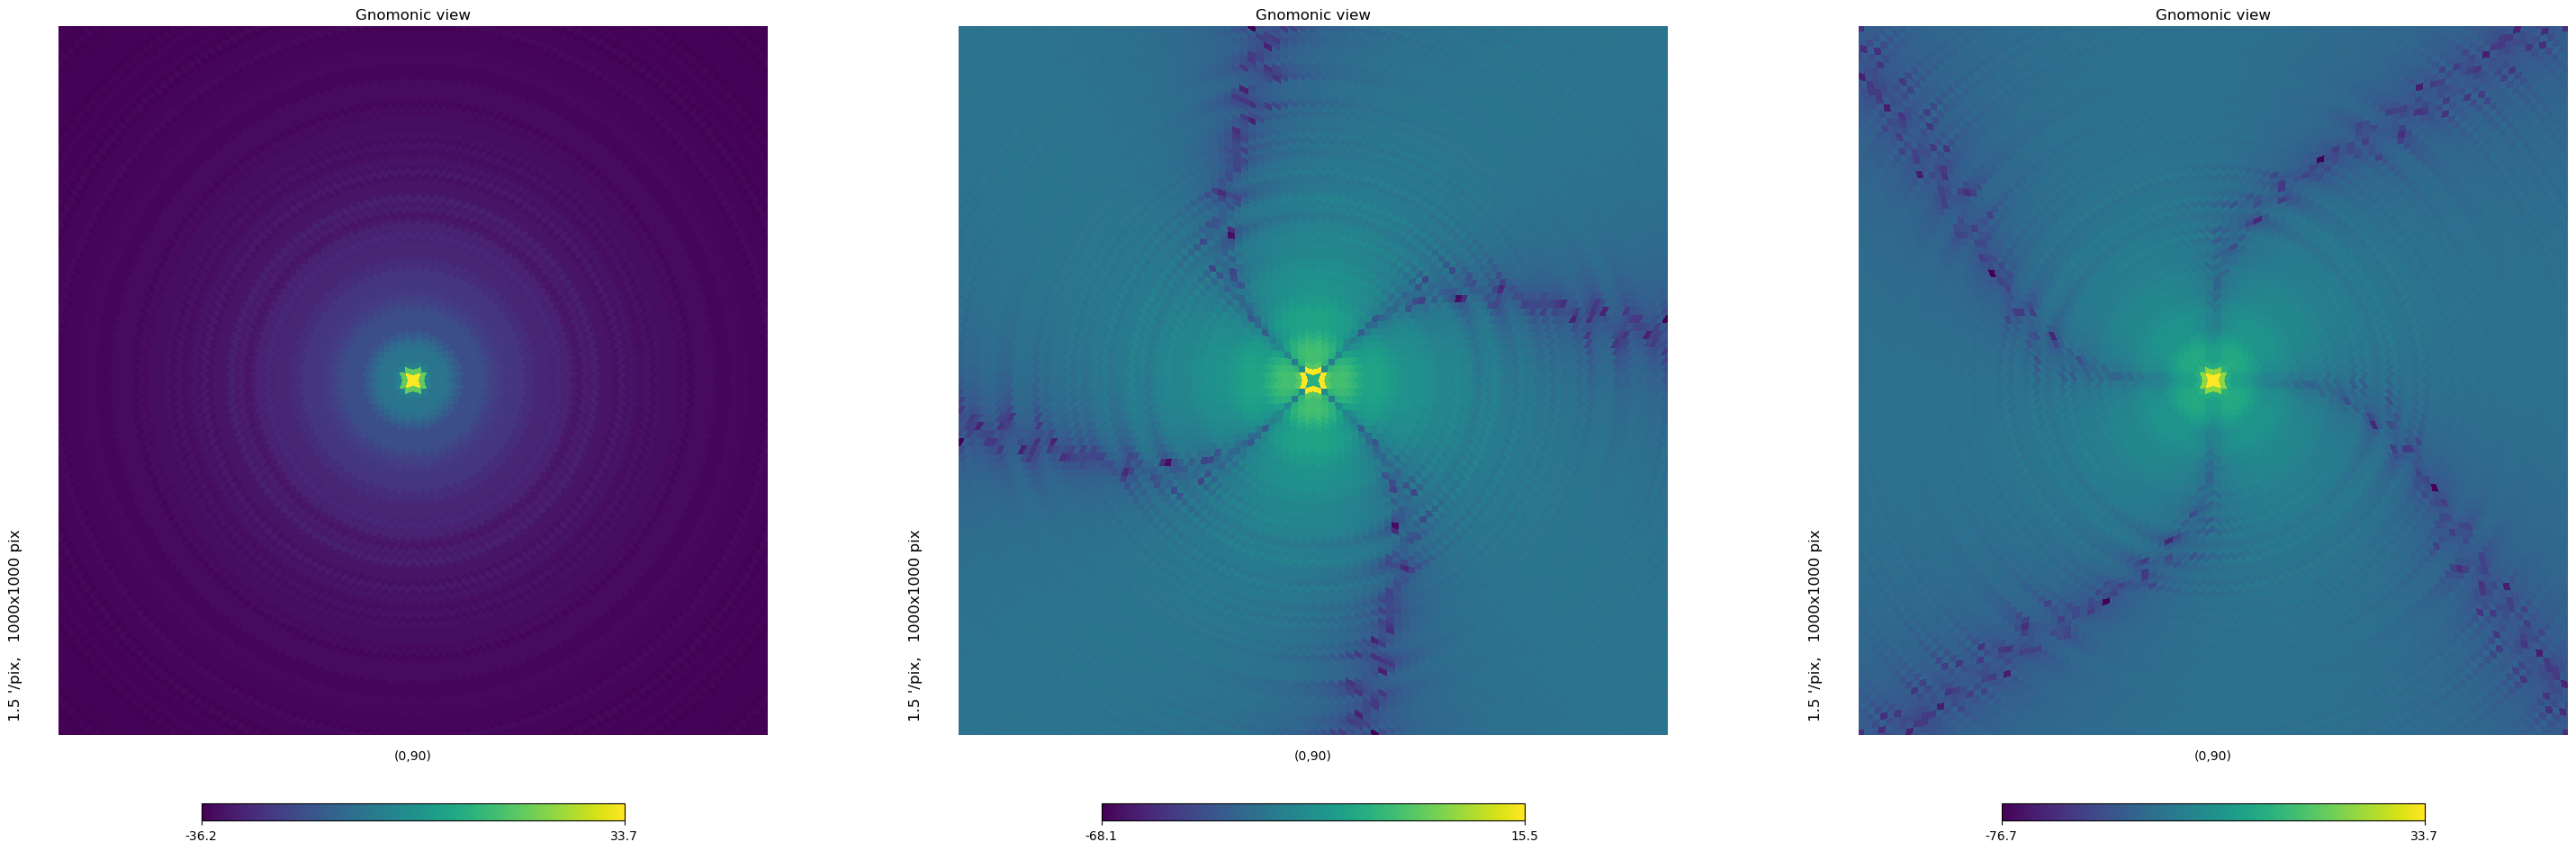

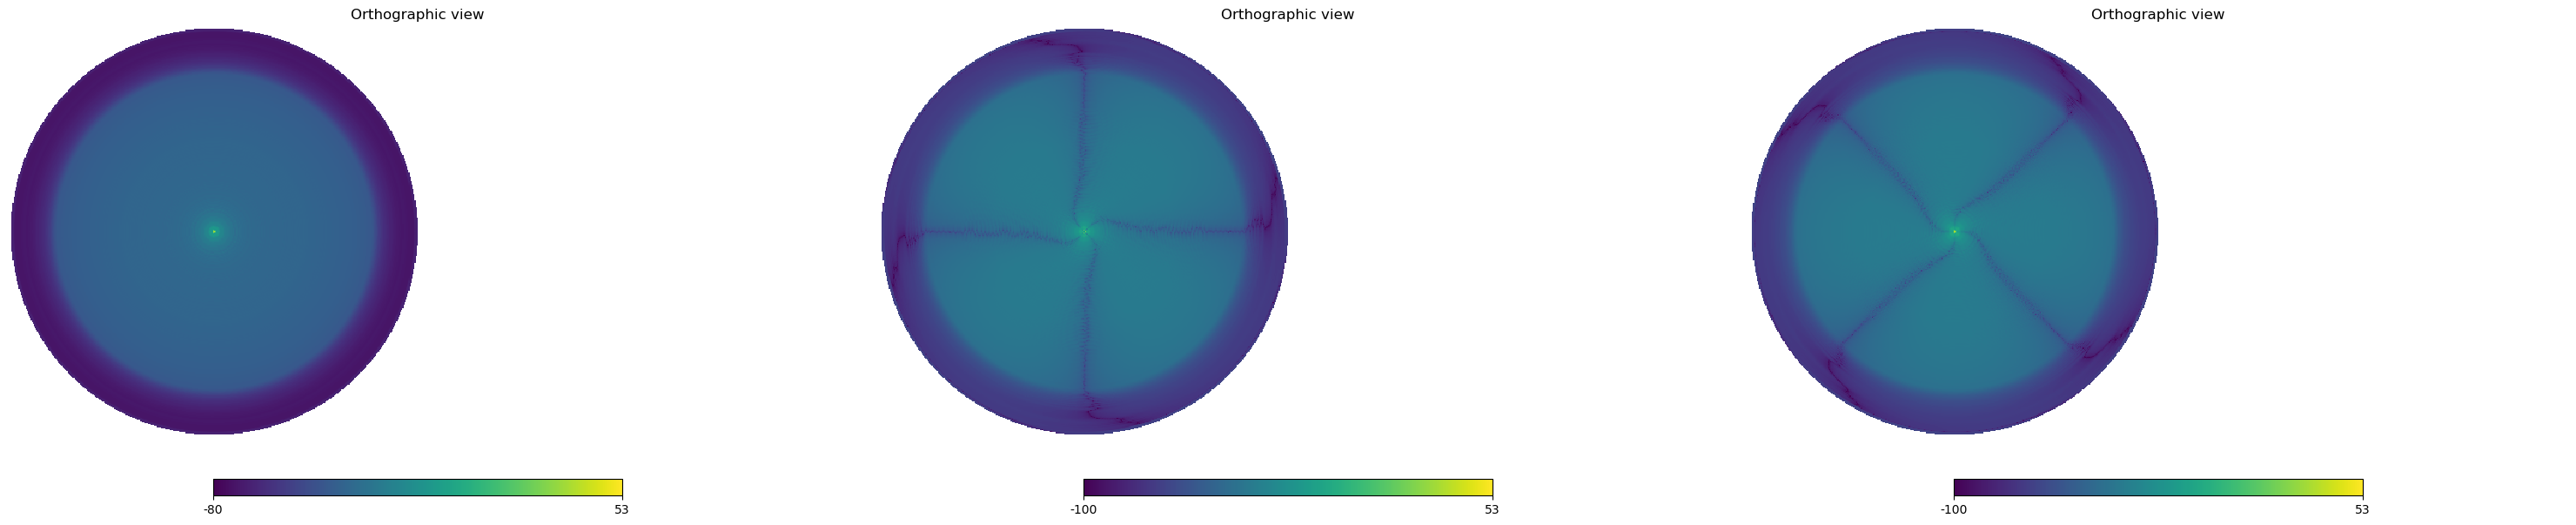

In [16]:
grid = bm_grid_read("/group/cmb/litebird/usr/nersc/GRASP/MHFT/pix0005_402_pp_f2p2_v4_hft_tp.grd")
pol_beam = bm_grid2polar(grid; copol = "x");

nside = 256
lmax = 3nside-1
mmax = 3nside-1
pol_beam = symmetrize(pol_beam, 0:0.1:2π, true)

Args = Dict(
    "beam_main_file_polar" => pol_beam,
    "beam_nside" => nside,
    "beam_lmax" => lmax,
    "beam_mmax" => lmax,
    "beam_healpix_output" => true,
    "full_weight_path" => weight_path
)

sym_map_blm = beam2alm(Args);

S = 1000
plt.figure(figsize=(30,10))
hp.gnomview(sym_map_blm[1].i.pixels .|> abs .|> dBi, norm="none", rot=(0,90), sub=(1,3,1), xsize=S, ysize=S)
hp.gnomview(sym_map_blm[1].q.pixels .|> abs .|> dBi, norm="none", rot=(0,90), sub=(1,3,2), xsize=S, ysize=S)
hp.gnomview(sym_map_blm[1].u.pixels .|> abs .|> dBi, norm="none", rot=(0,90), sub=(1,3,3), xsize=S, ysize=S)


plt.figure(figsize=(30,10))
hp.orthview(sym_map_blm[1].i .|> abs .|> dBi, rot=(0,90), min=-80,max=53, sub=(1,3,1))
hp.orthview(sym_map_blm[1].q .|> abs .|> dBi, rot=(0,90), min=-100,max=53, sub=(1,3,2))
hp.orthview(sym_map_blm[1].u .|> abs .|> dBi, rot=(0,90), min=-100,max=53, sub=(1,3,3))